In [ ]:
import pandas as pd

: 

# EDA

In [2]:
#Cargar archivo csv

df=pd.read_csv('C:/Users/Administrator/Desktop/Proyecto_ML Refuerzo/ML_Refuerzo_Esther/scr/data/teleCust1000t.csv')

In [3]:
#Primeras 5 filas

print (df.head()) 

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [4]:
#Nombre columnas

print (df.columns)

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [5]:
#Información general del DataFrame

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None


In [6]:
#Estadísticas descriptivas

print(df.describe())

          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.0000

In [7]:
#Suma de valores nulos por columna

print (df.isnull().sum())

#Total de valores nulos

print (df.isnull().sum().sum())

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64
0


In [8]:
import numpy as np

features = ['tenure', 'age', 'address', 'income', 'employ']
num_bins = 5

for feature in features:
    # Crear bins y asignar etiquetas de 1 a 5
    df[feature] = pd.qcut(df[feature], q=num_bins, labels=[1, 2, 3, 4, 5])
    
    # Convertir a tipo entero
    df[feature] = df[feature].astype(int)

    print(f"\nDistribución de {feature}:")
    print(df[feature].value_counts(normalize=True).sort_index())
    print(f"Valores únicos: {df[feature].nunique()}")


Distribución de tenure:
tenure
1    0.200
2    0.201
3    0.204
4    0.198
5    0.197
Name: proportion, dtype: float64
Valores únicos: 5

Distribución de age:
age
1    0.209
2    0.214
3    0.180
4    0.201
5    0.196
Name: proportion, dtype: float64
Valores únicos: 5

Distribución de address:
address
1    0.251
2    0.200
3    0.177
4    0.186
5    0.186
Name: proportion, dtype: float64
Valores únicos: 5

Distribución de income:
income
1    0.207
2    0.199
3    0.199
4    0.196
5    0.199
Name: proportion, dtype: float64
Valores únicos: 5

Distribución de employ:
employ
1    0.231
2    0.200
3    0.189
4    0.195
5    0.185
Name: proportion, dtype: float64
Valores únicos: 5


In [9]:
#Eliminar fila
#df_final=df[df['income']!=1668.0]


<function matplotlib.pyplot.show(close=None, block=None)>

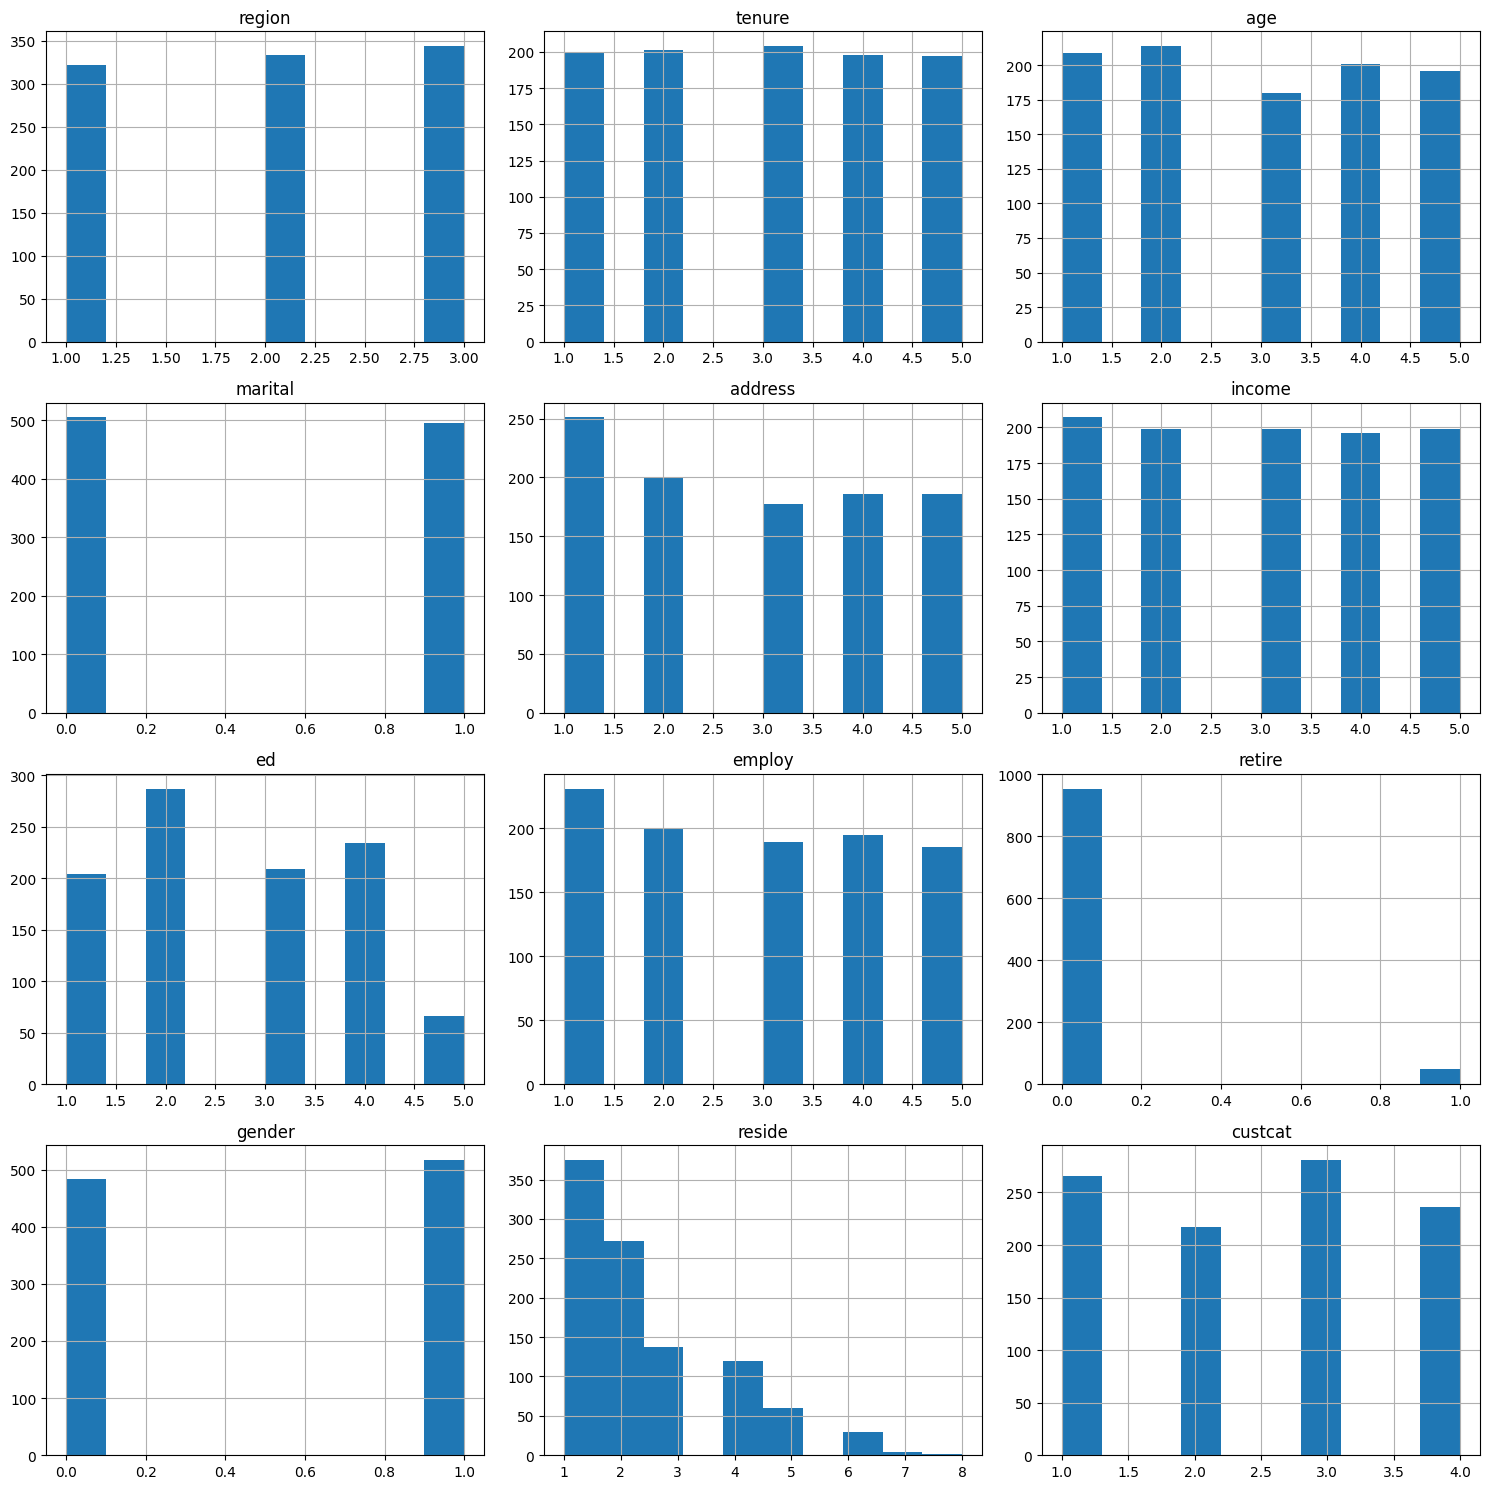

In [10]:
#Histograma para distribuciones
import matplotlib.pyplot as plt

df.hist (figsize=(15,15))
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

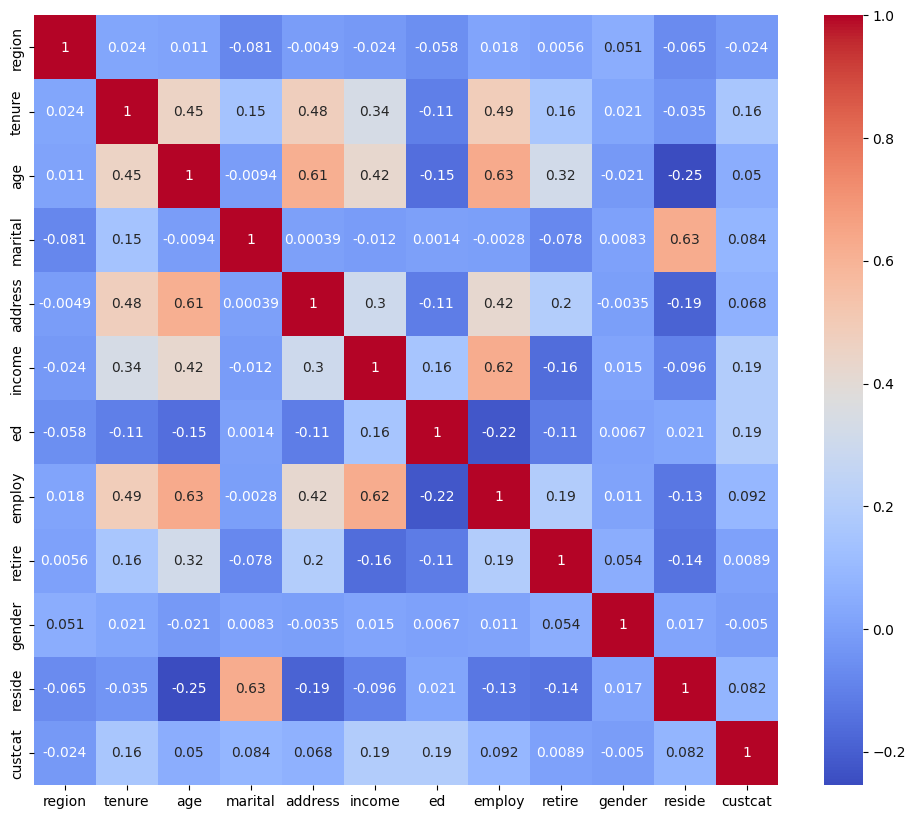

In [11]:
#Matriz de correlación

import seaborn as sns

correlation_matrix = df.corr()
plt.figure (figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show

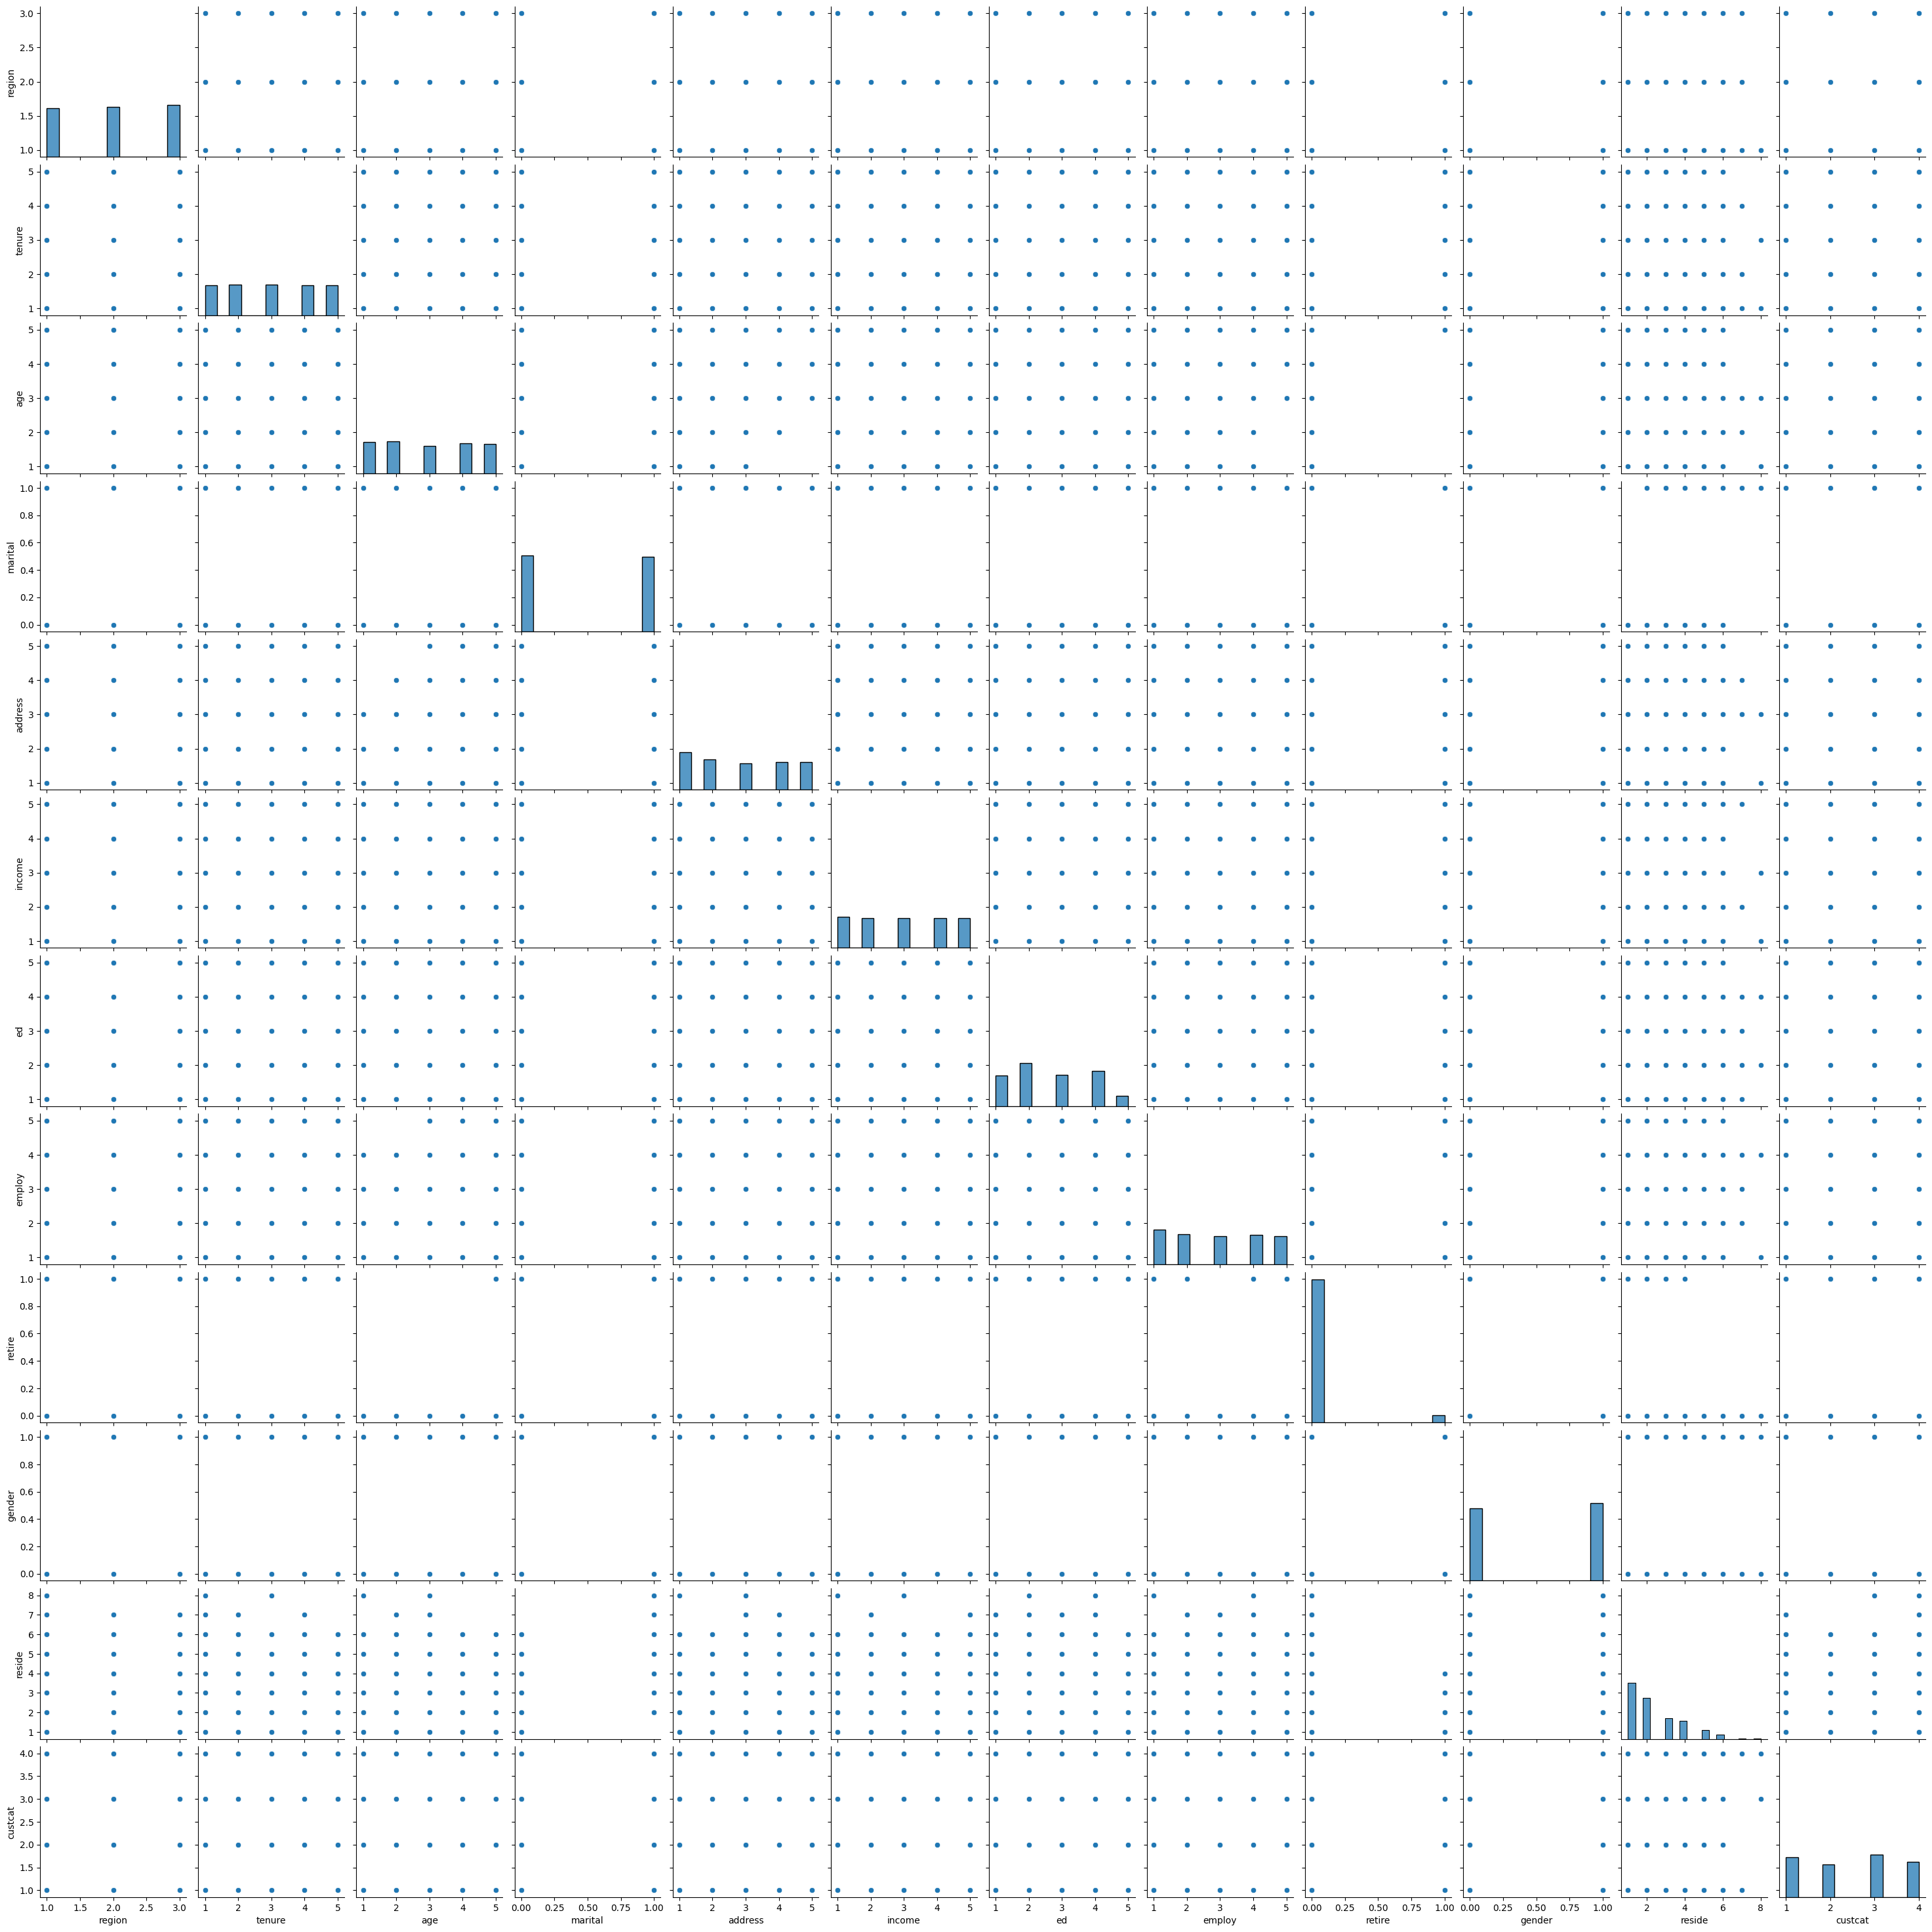

In [12]:
#Relaciones entre variables númericas

sns.pairplot(df)
plt.show()

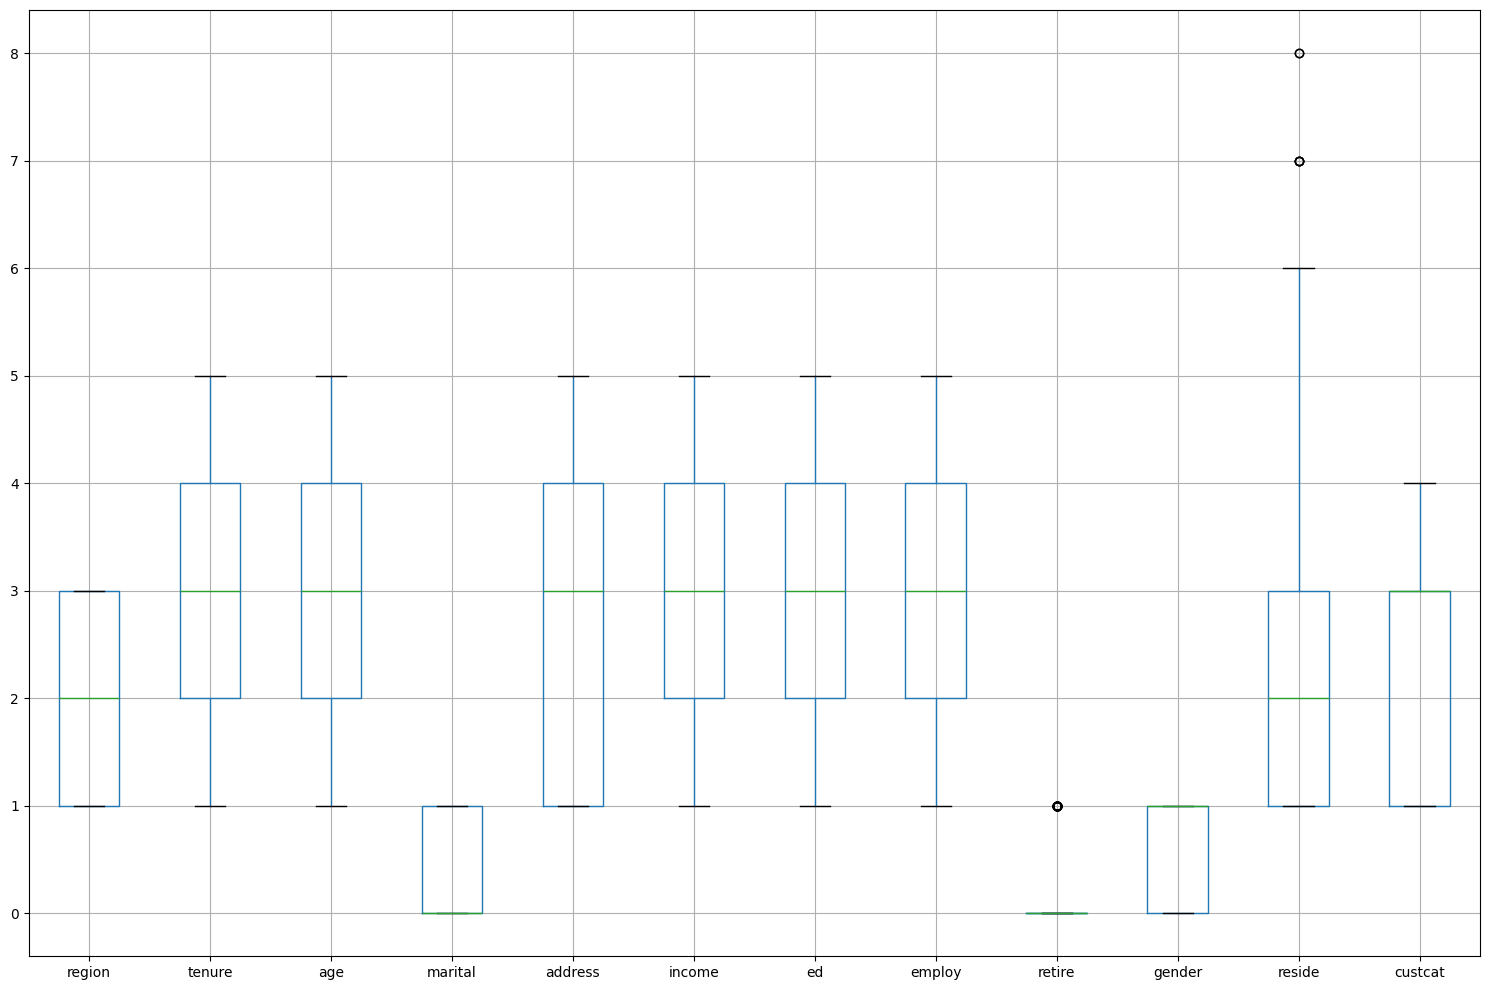

In [13]:
#Boxplots para detectar outliers

df.boxplot(figsize=(15,10))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

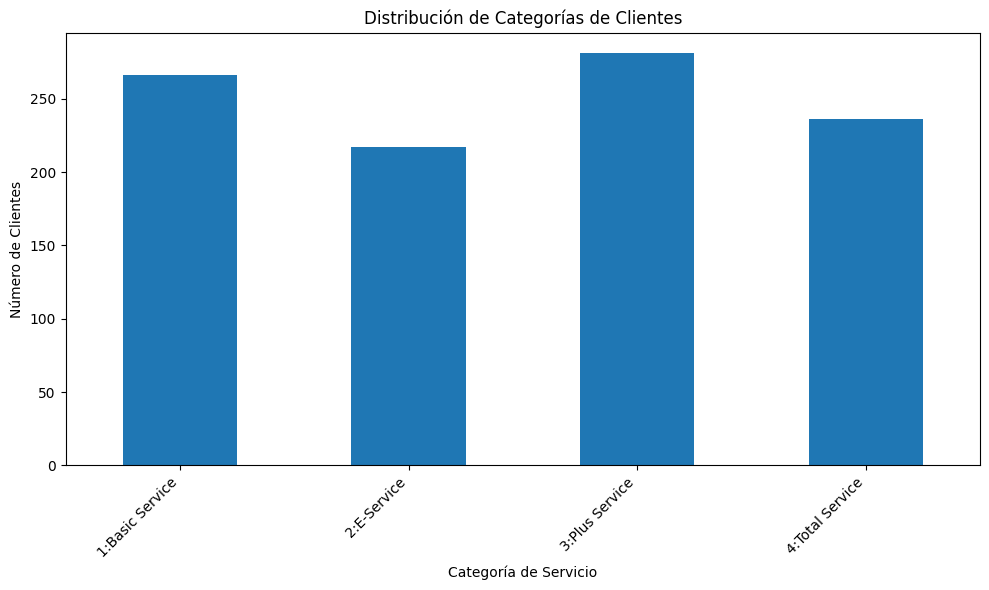

In [14]:
#Gráfico de barras para la variable objetivo

#Crear un diccionario que mapee los números a los nombres de los servicios

service_names= {
    1: 'Basic Service' ,
    2: 'E-Service',
    3: 'Plus Service',
    4: 'Total Service'
}

#Contar los valores y ordenarlos

value_counts= df ['custcat'].value_counts().sort_index()

#Crear el gráfico de barras

ax=value_counts.plot (kind='bar', figsize=(10,6))

#Personalizar las etiquetas del eje x

plt.xticks(range(len(value_counts)), [f"{i}:{service_names[i]}" for i in value_counts.index] , rotation=45, ha='right')

plt.title('Distribución de Categorías de Clientes')
plt.xlabel('Categoría de Servicio')
plt.ylabel('Número de Clientes')

#Ajustar el diseño para evitar que se corten las etiquetas

plt.tight_layout()

plt.show

